# Inteligencia Artificial.
Hacer programas que permitan a las computadoras hacer cosas que, cuando las hacen las personas, requieren inteligencia.

## Aprendizaje Automático.
Permite a las computadoras aprender sin ser programadas explícitamente.

### Redes Neuronales.
Las redes neuronales son un conjunto de algoritmos, modelados a partir de la estructura del cerebro humano, que permiten a las computadoras reconocer patrones.

#### Perceptron.

Los perceptrones son la forma más simple de red neuronal.
Son un tipo de red neuronal artificial que se utiliza para clasificar entradas según una función de activación.


<div style="text-align: center;">
    <img src="./Perceptrón.png" alt="Perceptrón" width="700"/>
</div>

La formula del perceptrón es:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$
donde:
- $x_i$ son las entradas.
- $w_i$ son los pesos.
- $b$ es el sesgo (bias).
- $f$ es la función de activación.
- $y$ es la salida del perceptrón.

La función de activación es la función escalón de Heaviside:

$$
f(x) = \left\{
\begin{array}{ll}
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0
\end{array}
\right.
$$

Valores reales     : 1.80 32.00
Valores aprendidos : 1.80 32.00
f(20=68.00)


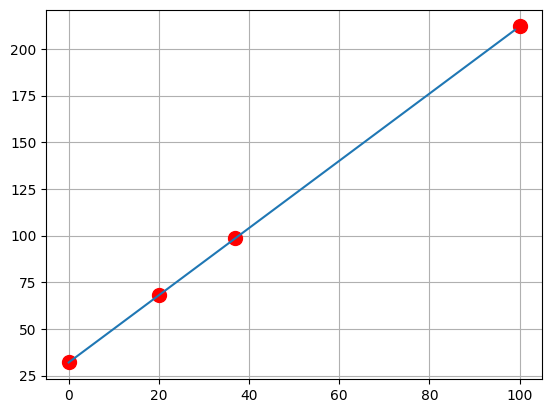

In [264]:
# 
# Perceptrón para convertir grados Celsius a Fahrenheit
# 

import random 

# Función de conversión de grados Celsius a Fahrenheit
# Esta es la función que queremos aprender con el perceptrón
def celsius_to_fahrenheit(c):
    return c * 1.8 + 32

# Sumatoria de los pesos por las entradas 
# (con 1 entrada, es equivalente a una multiplicación)
def perceptron(x, w, b): 
    return x * w + b  

# Función de activación
# En este caso, la función de activación es la identidad
def activacion(x):
    return x 

# Datos de entrenamiento
X = [100,  0,   37, 20]
y = [212, 32, 98.6, 68]

# Inicialización de los pesos
# (Parámetros a averiguar)
w = random.uniform(-3, 3)
b = random.uniform(-3, 3)

# Hiperparámetros (configuración del modelo)
velocidad_aprendizaje = 0.0001
epocas                = 100000

for e in range(epocas):

    for i in range(len(X)):
        x = X[i]

        # Predicción de la salida (usando el perceptrón)
        y_pred = activacion( perceptron(x, w, b) )
        
        # Cálculo del error (diferencia entre la predicción y el valor real)
        error = y_pred - y[i]

        # Actualización de los pesos (aprendizaje)
        w -= error * x * velocidad_aprendizaje
        b -= error * velocidad_aprendizaje

# Función para predecir la salida para un valor de entrada
# usando el perceptrón entrenado
def f(x):
    return activacion(perceptron(x, w, b))

# Imprimir los pesos aprendidos
print(f"Valores reales     : {1.8:.2f} {32:.2f}") 
print(f"Valores aprendidos : {w  :.2f} {b :.2f}")

print(f"f({20}={f(20):.2f})")
# Gráfica de los datos de entrenamiento y la función aprendida
import matplotlib.pyplot as plt

xr = list(range(0, 100))
yr = [f(x) for x in xr]
plt.plot(X, y, 'ro', markersize=10)
plt.plot(xr, yr, label='Perceptrón entrenado')
plt.grid()
plt.show()

In [265]:
#
# Perceptrón con 2 entradas para aprender compuertas lógicas
#

# x1  x2   y 
#  0   0   0
#  0   1   0
#  1   0   0
#  1   1   1

X = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

y = [0, 0, 0, 1] # AND

# y = [0, 1, 1, 1] # OR
# y = [0, 1, 1, 0] # XOR
# y = [1, 1, 1, 0] # NAND (compuerta universal)

# Perceptron con 2 entradas, 2 pesos y 1 sesgo
def perceptron(x1, x2, w1, w2, b):
    return x1 * w1 + x2 * w2 + b

# Funcion de activacion (Escalon)
def activacion(x): 
    return 1 if x >= 0 else 0 

# Parámetros a averiguar
w1 = random.uniform(-3, 3)
w2 = random.uniform(-3, 3)
b  = random.uniform(-3, 3)

# Hiperparámetros (configuración del modelo)
velocidad_aprendizaje = 0.001
epocas                = 10000

for e in range(epocas):
    for i in range(len(X)):
        x1, x2 = X[i]
       
        # Cálculo de la predicción
        y_pred = activacion(perceptron(x1, x2, w1, w2, b))
        
        # Cálculo del error 
        error = y[i] - y_pred

        # Actualización de los pesos (aprendizaje)
        w1 += error * x1 * velocidad_aprendizaje
        w2 += error * x2 * velocidad_aprendizaje
        b  += error * velocidad_aprendizaje

def f(x1, x2):
    return activacion(perceptron(x1, x2, w1, w2, b))

print(f"Parametros: w1:{w1:.2f} w2:{w2:.2f} b:{b:.2f}")
print("x1  x2  = f() y")
for (x, y) in zip(X,y):
    print(f"{x}  =  {f(*x)}  {y}")   


Parametros: w1:0.00 w2:0.63 b:-0.63
x1  x2  = f() y
(0, 0)  =  0  0
(0, 1)  =  0  0
(1, 0)  =  0  0
(1, 1)  =  1  1


In [266]:
#
# Perceptrón general (n entradas)
# (p.e: aplicado a compuertas lógicas)

# x1  x2  y 
#  0   0  0
#  0   1  0
#  1   0  0
#  1   1  1

X = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# y = [0, 0, 0, 1] # AND
# y = [0, 1, 1, 1] # OR
# y = [0, 1, 1, 0] # XOR
# y = [0,1,1,0] # XOR

y = [1, 1, 1, 0] # NAND (compuerta universal)

def perceptron(x, w, b): # Sumatoria de los pesos por las entradas
    z = 0 
    for i in range(len(x)):
        z += x[i] * w[i]
    z += b
    return z
    # return sum([x[i] * w[i] for i in range(len(x))]) + b

def activacion(x): # Funcion de activacion (Escalon)
    return 1 if x >= 0 else 0 

# Inicializacion de los pesos
# Parametros a averiguar

w = []
for i in range(len(X[0])):
    w.append(random.uniform(-3, 3))
# w = [ random.uniform(-3, 3) for i in range(len(X[0])) ]
b  = random.uniform(-3, 3)

# Hiperparametros (configuracion del modelo)
velocidad_aprendizaje = 0.001
epocas                = 10000
for e in range(epocas):

    for i in range(len(X)):
        # Calculo de la prediccion
        x = X[i]
        y_pred = activacion( perceptron(x, w, b) )
        
        # Calculo del error 
        error = y[i] - y_pred

        # Actualizacion de los pesos (aprendizaje)
        for j in range(len(w)):
            w[j] += error * x[j] * velocidad_aprendizaje
        # w = [ w[j] + error * x[j] * velocidad_aprendizaje for j in range(len(w)) ]
        b  += error * velocidad_aprendizaje

def f(x):
    return activacion(perceptron(x, w, b))

print(f"{w1} {w2:.2f} {b:.2f}")
for (x, y) in zip(X,y):
    print(f"{x} = {f(x)} {y}")



0.0021669871648548663 0.63 1.22
(0, 0) = 1 1
(0, 1) = 1 1
(1, 0) = 1 1
(1, 1) = 0 0


In [267]:
# 
# Perceptrón con Numpy
# 

import numpy as np

# Datos de entrada
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Etiquetas de salida
y = np.array([1, 1, 1, 0])  # NAND (compuerta universal)

# def perceptron(x, w, b): # Sumatoria de los pesos por las entradas
#     z = 0 
#     for i in range(len(x)):
#         z += x[i] * w[i]
#     z += b
#     return z
#     # return sum([x[i] * w[i] for i in range(len(x))]) + b

def perceptron(x, w, b):
    return np.dot(x, w) + b
    # return sum(x * w) + b

def activacion(x):
    return escalon(x) 

def escalon(x):
    return 1 if x >= 0 else 0

def sigmoide(x): # valores negativos tienden a 0 y positivos a 1
    return 1  (1 + np.exp(-x))

def tanh(x): # valores negativos tienden a -1 y positivos a 1
    return np.tanh(x)

def relu(x): # valores negativos son 0 y positivos se mantienen
    return max(0, x)

# Inicialización de los pesos y el sesgo
np.random.seed(0)  # Para reproducibilidad
w = np.random.uniform(-3, 3, X.shape[1])
b = np.random.uniform(-3, 3)

# Hiperparámetros
velocidad_aprendizaje = 0.001
epocas                = 10000

# Entrenamiento del perceptron
for _ in range(epocas):
    
    for i in range(len(X)):
        x = X[i]

        y_pred = activacion(perceptron(x, w, b))
        
        error = y[i] - y_pred
        w += error * x * velocidad_aprendizaje
        b += error * velocidad_aprendizaje

def f(x):
    return activacion(perceptron(x, w, b))

print(f"Parámetros: {w[0]:.2f} {w[1]:.2f} {b:.2f}")
for x, s in zip(X,y):
    print(f"{x} = {f(x)} {s}")

Parámetros: -0.16 -0.00 0.16
[0 0] = 1 1
[0 1] = 1 1
[1 0] = 1 1
[1 1] = 0 0


[0 0] = 1
[0 1] = 1
[1 0] = 1
[1 1] = 0
w:[-0.073 -0.001], b:0.073


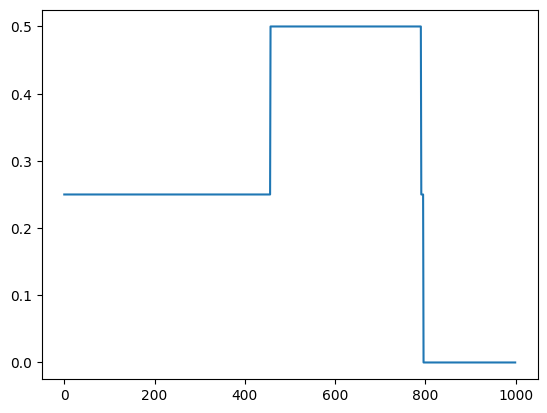

In [271]:
#
# Perceptrón con Numpy (clase)
# 

class Perceptron:
    def __init__(self, tasa_aprendizaje=0.001, epocas=1000):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.epocas           = epocas
        self.w                = None
        self.b                = None
        self.errores          = []

    def calculate(self, X):
        return np.dot(X, self.w) + self.b

    def activacion(self, z):
        return np.where(z > 0, 1, 0)

    def loss(self, Y, Yp):
        return np.sum((Y - Yp)**2) / len(Y)
    
    def fit(self, X, Y):
        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand(1)

        for epoca in range(self.epocas):

            # Predice el valor de y en funcion del valor X y los pesos w y b 
            yp = self.activacion(self.calculate(X))

            # Calcula el error
            error = Y - yp

            # Actualiza los pesos y el bias
            # Backpropagation (retropropagacion)
            self.w += self.tasa_aprendizaje * np.dot(X.T, error)
            self.b += self.tasa_aprendizaje * error.sum()

            self.errores.append(self.loss(Y, yp))

    def predict(self, X):
        return self.activacion(self.calculate(X))[0]
    
    def __repr__(self):
        return f"w:{self.w.round(3)}, b:{self.b[0].round(3)}"

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 1, 1, 0])  # NAND (compuerta universal)

p = Perceptron(.001, 1000)
p.fit(X, y)
for x in X:
    print(f"{x} = {p.predict(x)}")

print(p)

[0 0] = 0.0
[0 1] = 1.0
[1 0] = 1.0
[1 1] = 1.0
w:[0.21  0.469], b:-0.009


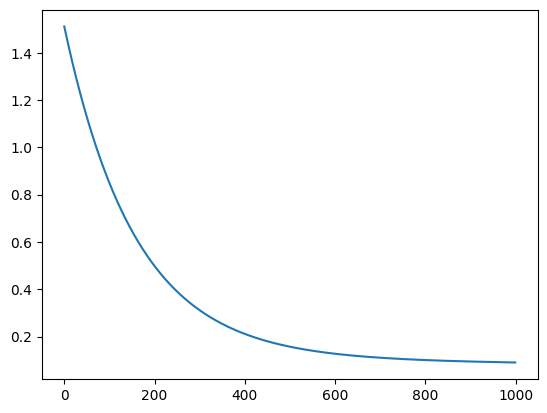

In [269]:
import numpy as np
import torch

class Perceptron:
    def __init__(self, tasa_aprendizaje=0.01, epocas=1000):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.epocas = epocas
        self.w = None
        self.b = None
        self.errores = []

    def activacion(self, x): # Escalon (Heaviside)
        return torch.where(x >= 0, torch.tensor(1.0), torch.tensor(0.0))

    def calculate(self, X):
        return torch.matmul(X, self.w) + self.b

    def error(self, y, yp):
        return torch.mean((y - yp) ** 2)

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)

        self.w = torch.rand(X.shape[1], dtype=torch.float32, requires_grad=True)
        self.b = torch.rand(1, dtype=torch.float32, requires_grad=True)

        optimizer = torch.optim.SGD([self.w, self.b], lr=self.tasa_aprendizaje)

        for epoca in range(self.epocas):
            optimizer.zero_grad()
            z  = self.calculate(X)   # Calcular z antes de la activación
            yp = self.activacion(z)  # Aplicar la función de activación
            loss = self.error(y, z)  # Calcular la pérdida usando z
            loss.backward()
            optimizer.step()
            self.errores.append(loss.item())

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        return self.activacion(self.calculate(X)).item()
    
    def __str__(self):
        return f"w:{self.w.detach().numpy().round(3)}, b:{self.b.item():.3f}"

# Datos de entrada
X = np.array([(0,0),(0,1),(1,0),(1,1)])
# y = np.array([1, 0, 0, 0])   # NAND 
# y = np.array([0, 1, 1, 1])   # AND 
y = np.array([0, 0, 0, 1])   # OR 

# Entrenamiento del perceptrón
p = Perceptron(tasa_aprendizaje=0.001, epocas=1000)
p.fit(X, y)

# Predicciones
for x in X:
    print(f"{x} = {p.predict(x)}")

print(str(p))
plt.plot(p.errores)

Parametros aprendidos: w:[-0.111  0.323 -0.32   0.153], b:0.395
Prediccion para [6.1 2.9 4.7 1.4] = 0 (real: 0)
Paramettros aprendidos: w:[-0.111  0.323 -0.32   0.153], b:0.395


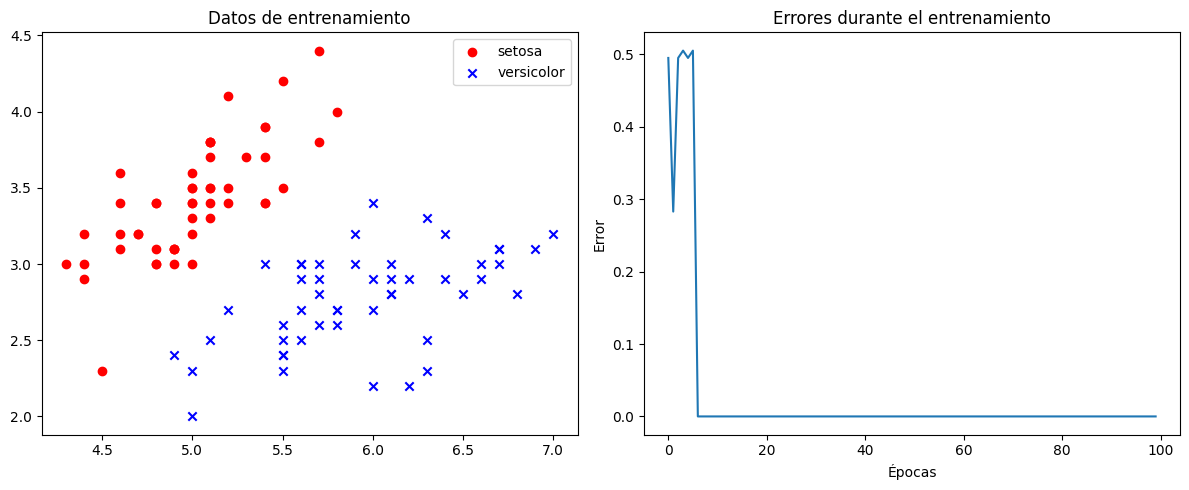

In [287]:
import pandas as pd
df = pd.read_csv('iris.csv', header=None, encoding='utf-8')

X = df.iloc[1:100, 0:4].astype(float).values

y = df.iloc[1:100, 4].values
y  = np.where(y == 'Iris-setosa', 1, 0)
ya = np.where(y == 'Iris-versicolor', 1, 0)
yb = np.where(y == 'Iris-virginica', 1, 0)

p = Perceptron(tasa_aprendizaje=0.001, epocas=100)
p.fit(X, y)

pa = Perceptron(tasa_aprendizaje=0.001, epocas=100)
pa.fit(X, ya)

pb = Perceptron(tasa_aprendizaje=0.001, epocas=100)
pb.fit(X, yb)

print(f"Parametros aprendidos: {p}")

ej = X[63]
sd = y[63]
print(f"Prediccion para {ej} = {p.predict(ej)} (real: {sd})")
print(f"Paramettros aprendidos: {p}")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico
axs[0].scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
axs[0].scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
axs[0].set_title('Datos de entrenamiento')
axs[0].legend()

# Segundo gráfico
axs[1].plot(p.errores)
axs[1].set_title('Errores durante el entrenamiento')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Error')

plt.tight_layout()
